## The Objective

The objective is to minimize the customer's monetary loss using machine learning techniques. The customer is currently experiencing a 25.00 dollar loss for each false positive prediction and a loss of 125.00 dollars for false negative predictions. Our goal in this scenario is to generate a model that minimizes the cost of doing business and provide adequate justifications for the decisions made in the final model.

## The Dataset

The dataset features 160,000 records, 50 features, and a binary target variable. The dataset does not come with any metadata at all, so we must rely strictly on the interpretations of each feature and discover relationships between the features that help to meet the overall objective of minimizing costs for the customer.

## Methods

### Data Cleaning

The data are mostly clean, with the exception of five features that required mild transformations to make them machine readable. An example of the formatting of these features is provided.

|          | x24 | x29 | x30 | x32 | x37 |
|----------|--------|--------|--------|--------|--------|
| Data Type | object | object | object | object | object |
| Data Example | asia | July | wednesday | 0.01% | $287.14 |

Features x32 and x37 were transformed into a numeric format by simply removing the non_numeric characters. Features x24, x29, and x30 were transformed into a numeric format using SciKit-Learn's LabelEncoder\footnotemark.

\footnotetext{https://scikit-learn.org/stable/modules/impute.html}

### Data Imputation

The dataset contains missing values that were judged to be missing at random. Missing values were imputed using SciKit-Learn's KNNImputer with the `n_neighbors` parameter set to three\footnotemark.

\footnotetext{https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html}


### Modeling

#### Recursive Feature Selection

A baseline Logistic Regression model was built using Recursive Feature Selection to first determine an ideal number of features that emphasizes overall accuracy. Although accuracy appears to plateau after 10 features, our objective is to limit the financial loss to the customer, so as many features as are empirically necessary to limit this financial loss will be used. This procedure determined that the training and test sets could be limited to 45 out of the 50 features in the given dataset.

![Recursive Feature Selection](./feature_selection.png)

#### Hyperparameter Tuning

To complete the baseline model, a randomized grid search was conducted to find the best C value and regularization term\footnotemark. 

|          |     C    | Regularization | Number of Features | 
|----------|----------|----------------|--------------------|
| baseline |  0.3712  |   `l2`    |    45     |


\footnotetext{https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html}


## Results


| Model | False Negatives | False Positives | Estimated Loss | 
|-------|-----------------|-----------------|----------------|
| Baseline | 6090 | 3428 | $846,950.00 |

## Code

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

# pd.options.display.max_columns = 100
random_state = 42

In [2]:
data = pd.read_csv('./final_project.csv')
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [3]:
y = data['y']
X = data.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
print('X_train: ', X_train.shape,
      '\ny_train: ', y_train.shape,
      '\nX_test: ', X_test.shape,
      '\ny_test: ', y_test.shape)

X_train:  (128000, 50) 
y_train:  (128000,) 
X_test:  (32000, 50) 
y_test:  (32000,)


In [4]:
# pd.options.display.max_columns = 49
X_train.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49
count,127982.000000,127981.000000,127972.000000,127970.000000,127983.000000,127969.000000,127979.000000,127975.000000,127981.000000,127974.000000,...,127975.000000,127968.000000,127980.000000,127971.000000,127968.000000,127979.000000,127976.000000,127972.000000,127971.000000,127973.000000
mean,-0.000233,0.015927,-1.137009,-0.030134,-0.005189,0.017988,-1.650412,-7.632300,-0.036771,0.013169,...,-2.280161,6.696548,-1.823620,-0.004985,-0.007610,0.000887,-12.757091,0.021462,0.000821,-0.664870
std,0.371378,6.338409,13.287193,8.067211,6.381621,7.673899,19.318144,30.583165,8.898180,6.347198,...,17.047011,18.697780,5.106297,1.534255,4.157975,0.396842,36.606157,4.794483,1.936761,15.055081
min,-1.592635,-26.053979,-59.394048,-33.864827,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,...,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191
25%,-0.250854,-4.239255,-10.166609,-5.459399,-4.315710,-5.153559,-14.779614,-27.238063,-6.036748,-4.248533,...,-13.918753,-5.804080,-5.147121,-1.041030,-2.808371,-0.266998,-36.444478,-3.232455,-1.322622,-10.937141
50%,-0.001322,0.028105,-1.312739,-0.031448,0.009683,0.028314,-1.905278,-6.873548,-0.014964,0.004454,...,-2.672047,6.824208,-1.917862,-0.007160,-0.010351,0.001770,-12.977831,0.021841,-0.012518,-0.572639
75%,0.249459,4.291164,7.865764,5.429540,4.298284,5.196676,11.439981,12.284980,5.957489,4.302156,...,9.000087,19.273821,1.465863,1.029794,2.777005,0.268573,11.484705,3.266336,1.319282,9.679463
max,1.600849,27.988178,57.908998,38.906025,26.247812,35.550110,84.195332,149.150634,39.049831,27.377842,...,88.824477,100.050432,22.668041,6.441093,17.007392,1.669205,150.859415,20.836854,8.206509,66.877604


In [5]:
# assess missingness in data
names = X_train.columns
for i in names:
    print(i, ': ', 'Train-', sum(pd.isna(X_train[i])),
          'Test-', sum(pd.isna(X_test[i])))

x0 :  Train- 18 Test- 8
x1 :  Train- 19 Test- 6
x2 :  Train- 28 Test- 10
x3 :  Train- 30 Test- 7
x4 :  Train- 17 Test- 9
x5 :  Train- 31 Test- 6
x6 :  Train- 21 Test- 5
x7 :  Train- 25 Test- 2
x8 :  Train- 19 Test- 2
x9 :  Train- 26 Test- 4
x10 :  Train- 33 Test- 10
x11 :  Train- 23 Test- 7
x12 :  Train- 31 Test- 5
x13 :  Train- 26 Test- 5
x14 :  Train- 29 Test- 5
x15 :  Train- 29 Test- 6
x16 :  Train- 19 Test- 7
x17 :  Train- 19 Test- 8
x18 :  Train- 35 Test- 5
x19 :  Train- 24 Test- 11
x20 :  Train- 34 Test- 4
x21 :  Train- 21 Test- 8
x22 :  Train- 21 Test- 6
x23 :  Train- 38 Test- 9
x24 :  Train- 24 Test- 4
x25 :  Train- 19 Test- 3
x26 :  Train- 28 Test- 8
x27 :  Train- 26 Test- 4
x28 :  Train- 29 Test- 6
x29 :  Train- 19 Test- 11
x30 :  Train- 23 Test- 7
x31 :  Train- 34 Test- 5
x32 :  Train- 26 Test- 5
x33 :  Train- 35 Test- 6
x34 :  Train- 36 Test- 5
x35 :  Train- 25 Test- 5
x36 :  Train- 21 Test- 6
x37 :  Train- 17 Test- 6
x38 :  Train- 26 Test- 5
x39 :  Train- 16 Test- 7
x40 : 

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128000 entries, 111609 to 57443
Data columns (total 50 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      127982 non-null  float64
 1   x1      127981 non-null  float64
 2   x2      127972 non-null  float64
 3   x3      127970 non-null  float64
 4   x4      127983 non-null  float64
 5   x5      127969 non-null  float64
 6   x6      127979 non-null  float64
 7   x7      127975 non-null  float64
 8   x8      127981 non-null  float64
 9   x9      127974 non-null  float64
 10  x10     127967 non-null  float64
 11  x11     127977 non-null  float64
 12  x12     127969 non-null  float64
 13  x13     127974 non-null  float64
 14  x14     127971 non-null  float64
 15  x15     127971 non-null  float64
 16  x16     127981 non-null  float64
 17  x17     127981 non-null  float64
 18  x18     127965 non-null  float64
 19  x19     127976 non-null  float64
 20  x20     127966 non-null  float64
 21  x21   

In [7]:
objects = X_train.select_dtypes(['O'])
objects_test = X_test.select_dtypes(['O'])
objects.head()

,x24,x29,x30,x32,x37
111609,asia,Apr,wednesday,-0.0%,$100.73
3785,asia,May,wednesday,0.01%,$1005.31
64066,asia,July,wednesday,0.0%,$-1406.52
103309,asia,Jun,wednesday,0.01%,$-1287.29
9084,asia,Aug,tuesday,0.02%,$-1670.43


In [8]:
objects.describe()

,x24,x29,x30,x32,x37
count,127976,127981,127977,127974,127983
unique,3,12,5,12,107696
top,asia,July,wednesday,0.01%,$237.4
freq,111198,36384,81253,32630,6


In [9]:
# fix spelling error
X_test['x24'] = X_test['x24'].str.replace('euorpe', 'europe')
# remove  %
X_test['x32'] = pd.to_numeric(X_test['x32'].str.replace('%', ''))
# remove $
X_test['x37'] = pd.to_numeric(X_test['x37'].str.replace('$', ''))
# repeat process for training set
X_train['x24'] = X_train['x24'].str.replace('euorpe', 'europe')
X_train['x32'] = pd.to_numeric(X_train['x32'].str.replace('%', ''))
X_train['x37'] = pd.to_numeric(X_train['x37'].str.replace('$', ''))
# remake objects
objects = X_train.select_dtypes(['O'])
objects_test = X_test.select_dtypes(['O'])
objects.describe()

/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,x24,x29,x30
count,127976,127981,127977
unique,3,12,5
top,asia,July,wednesday
freq,111198,36384,81253


In [10]:
# imputing with mode from training data
X_train['x24'].fillna('asia', inplace=True)
X_train['x29'].fillna('July', inplace=True)
X_train['x30'].fillna('wednesday', inplace=True)

X_test['x24'].fillna('asia', inplace=True)
X_test['x29'].fillna('July', inplace=True)
X_test['x30'].fillna('wednesday', inplace=True)
for i in objects.columns:
    print(i, sum(pd.isna(X_train[i])), '\t', sum(pd.isna(X_test[i])))

x24 0 	 0
x29 0 	 0
x30 0 	 0


/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [11]:
# label encode all string values
from sklearn.preprocessing import LabelEncoder

names = [i for i in list(objects.columns)]

le = LabelEncoder()
for i in names:
    le.fit(objects[i].astype(str))
    X_train[i] = le.transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
from sklearn.impute import KNNImputer

KNNimp = KNNImputer(n_neighbors=3)
X_train = KNNimp.fit_transform(X_train)
X_test = KNNimp.transform(X_test)

In [13]:
print(np.isnan(X_train).any())
print(np.isnan(X_test).any())

False
False


In [14]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

# define the estimator
logistic = LogisticRegression()
# provide the parameters of the feature selection process
feature_selector = RFECV(logistic,
          step = 1,
          min_features_to_select= 1,
          cv = 5,
          n_jobs = -1)
feature_selector = feature_selector.fit(X_train, y_train)

/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/stuart/anaconda3/envs/tf2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modu

Optimal number of features : 37


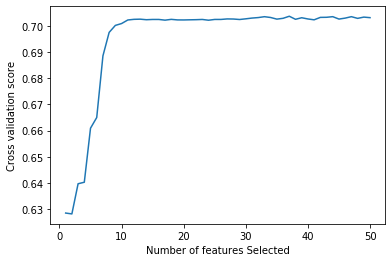

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
# visualize the results
print('Optimal number of features : %d' % feature_selector.n_features_)
plt.figure()
plt.xlabel('Number of features Selected')
plt.ylabel('Cross validation score')
plt.plot(range(1,len(feature_selector.grid_scores_) +1), feature_selector.grid_scores_)
plt.show()
plt.savefig('./feature_selection.png')

That's a lot of features with just a little return, but we're trying to minimize costs, so we can afford to put them in in the model.

In [16]:
X_train = feature_selector.transform(X_train)
X_test = feature_selector.transform(X_test)
print('X_train shape: ', X_train.shape, 
      '\nX_test shape: ', X_test.shape)

X_train shape:  (128000, 37) 
X_test shape:  (32000, 37)


In [17]:
# randomized grid search to fine best parameters for logistic regression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# instantiate estimator
logistic = LogisticRegression(solver='saga', 
                              tol=1e-2,
                              max_iter=200,
                              random_state = random_state)
# define search space
penalty = ['l1', 'l2']
C = uniform(loc=0, scale=4)
hyperparameters = dict(C=C, penalty=penalty)
# instantiate grid search
clf = RandomizedSearchCV(logistic, 
                         hyperparameters,
                         random_state=1,
                         n_iter=100,
                         cv=5,
                         verbose=0,
                         n_jobs=-1)

# search for best parameters
search = clf.fit(X_train, y_train)

In [18]:
print('Best Penalty:', search.best_estimator_.get_params()['penalty'])
print('Best C:', search.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 1.668088018810296


In [19]:
from sklearn.metrics import classification_report
preds = search.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77     19161
           1       0.66      0.53      0.59     12839

    accuracy                           0.70     32000
   macro avg       0.69      0.67      0.68     32000
weighted avg       0.70      0.70      0.70     32000



In [20]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
cm

array([[15738,  3423],
       [ 6089,  6750]])

In [21]:
# [[TP, FP],
#  [FN, TN]]

# precision = TP / TP + FP
# recall = TP / TP + FN
# accuracy = TP + TN / total
FN = cm[1][0]
FP = cm[0][1]
loss = 25*FP + 125*FN
loss

846700

In [22]:
import numpy as np
kwargs = dict(delimiter=",",
              skip_header=1,
              dtype='float64'
             )
df = np.genfromtxt('./final_project.csv',**kwargs)
X2 = df[:,:-1]
y2 = df[:,-1]

### Below, we used the Anderson Darling Test to determine if features are normally distributed or not. This is useful for our imputation strategy. Where the critical value is exceeded by the test statistic under the assumption of normality, we reject the null hypothesis and conclude violaiton. Therefore, for these, we apply a median imputation because while the distributions appear normal visually, there are outliers influencing normality at a 95% confidence level.

### Also, we identify columns that are unable to be tested for having insufficient values required for the test.

Column 2 is not normally distributed at a 95% level of confidence. Statistic: 10.220688929781318 and Critical Value: 0.787


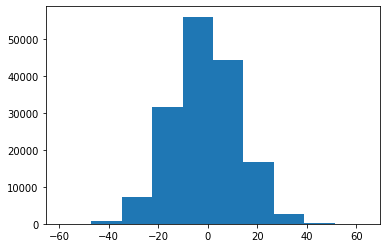

Column 6 is not normally distributed at a 95% level of confidence. Statistic: 10.270658839464886 and Critical Value: 0.787


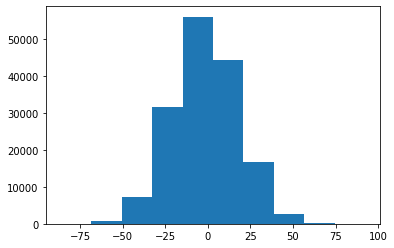

Column 7 is not normally distributed at a 95% level of confidence. Statistic: 58.931357158726314 and Critical Value: 0.787


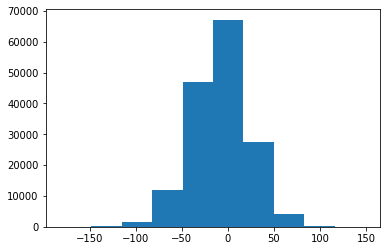

Column 12 is not normally distributed at a 95% level of confidence. Statistic: 26.41666220035404 and Critical Value: 0.787


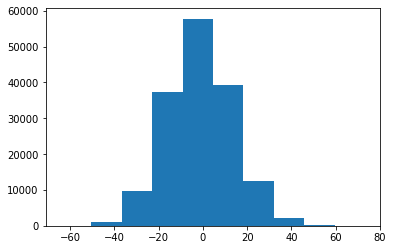

Column 20 is not normally distributed at a 95% level of confidence. Statistic: 29.789376930275466 and Critical Value: 0.787


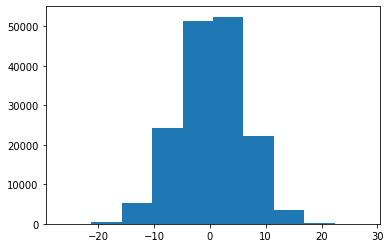

Column 23 is not normally distributed at a 95% level of confidence. Statistic: 29.42702754313359 and Critical Value: 0.787


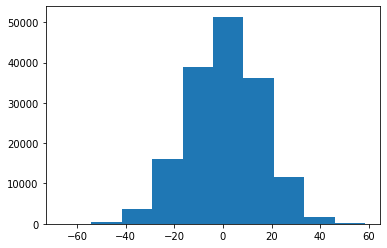

Column 27 is not normally distributed at a 95% level of confidence. Statistic: 5.4526740521832835 and Critical Value: 0.787


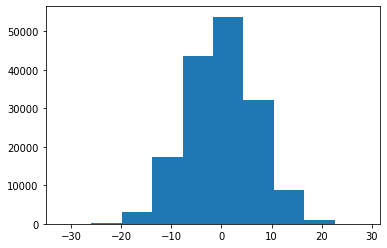

Column 28 is not normally distributed at a 95% level of confidence. Statistic: 13.03100506181363 and Critical Value: 0.787


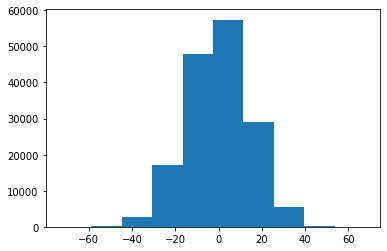

Column 38 is not normally distributed at a 95% level of confidence. Statistic: 3.5536952081602067 and Critical Value: 0.787


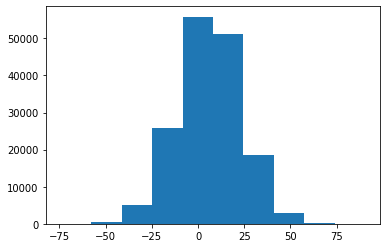

Column 40 is not normally distributed at a 95% level of confidence. Statistic: 26.42135159339523 and Critical Value: 0.787


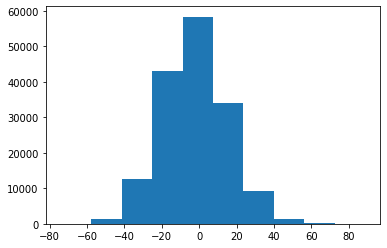

Column 41 is not normally distributed at a 95% level of confidence. Statistic: 3.595784921606537 and Critical Value: 0.787


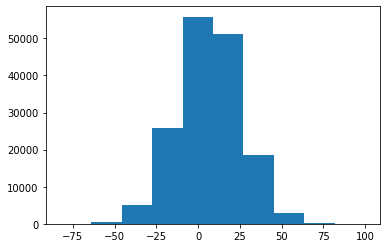

Column 42 is not normally distributed at a 95% level of confidence. Statistic: 47.59360718273092 and Critical Value: 0.787


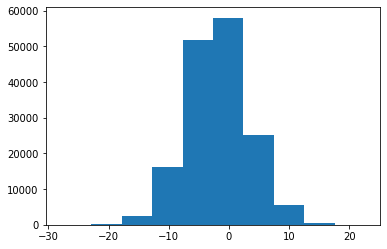

Column 46 is not normally distributed at a 95% level of confidence. Statistic: 31.06127203576034 and Critical Value: 0.787


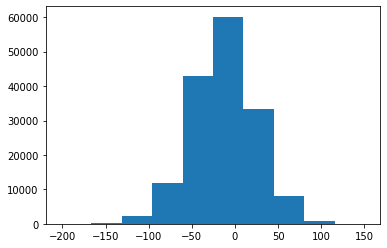

Column 48 is not normally distributed at a 95% level of confidence. Statistic: 2.897343336167978 and Critical Value: 0.787


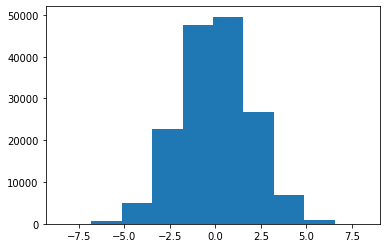

Column 49 is not normally distributed at a 95% level of confidence. Statistic: 6.4221460196131375 and Critical Value: 0.787


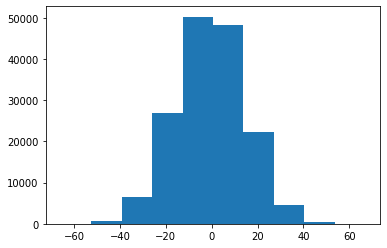

Columns that are not numeric: [24, 29, 30, 32, 37]


In [23]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

non_parametric=[]
bad_cols=[]

for i in np.arange(0,np.shape(X2)[1]):
    try:
        statistic = stats.anderson(X2[~np.isnan(X2[:,i]),i], dist='norm').statistic
        crit_val = stats.anderson(X2[~np.isnan(X2[:,i]),i], dist='norm').critical_values[2] # 5% significance, 95% confidence)

        if (crit_val < statistic):
            print("Column {} is not normally distributed at a 95% level of confidence. Statistic: {} and Critical Value: {}".format(i, statistic, crit_val));
            non_parametric.append(i)
            plt.hist(X2[~np.isnan(X2[:,i]),i])
            plt.show()
    except:
        bad_cols.append(i)
print("Columns that are not numeric: {}".format(bad_cols))

### The columns that are not normally distributed to not appear to be in wild violation of normality. Therefore, we can assume the SimpleImputer would work reasonable well using the mean.

Drop the non-numeric columns:

In [24]:
X_numeric = np.delete(X2, bad_cols, axis=1)

In [25]:
np.shape(X_numeric)

(160000, 45)

In [26]:
for i in np.arange(np.shape(X_numeric)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(X_numeric[:,i]))/np.shape(X_numeric[:,i])[0]),2)))

Percent of column 0 having missing values: 0.02%
Percent of column 1 having missing values: 0.02%
Percent of column 2 having missing values: 0.02%
Percent of column 3 having missing values: 0.02%
Percent of column 4 having missing values: 0.02%
Percent of column 5 having missing values: 0.02%
Percent of column 6 having missing values: 0.02%
Percent of column 7 having missing values: 0.02%
Percent of column 8 having missing values: 0.01%
Percent of column 9 having missing values: 0.02%
Percent of column 10 having missing values: 0.03%
Percent of column 11 having missing values: 0.02%
Percent of column 12 having missing values: 0.02%
Percent of column 13 having missing values: 0.02%
Percent of column 14 having missing values: 0.02%
Percent of column 15 having missing values: 0.02%
Percent of column 16 having missing values: 0.02%
Percent of column 17 having missing values: 0.02%
Percent of column 18 having missing values: 0.03%
Percent of column 19 having missing values: 0.02%
Percent of

In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X_numeric)
X_numeric = imp.transform(X_numeric)

### Check to confirm numeric imputation was successful:

In [28]:
for i in np.arange(np.shape(X_numeric)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(X_numeric[:,i]))/np.shape(X_numeric[:,i])[0]),2)))

Percent of column 0 having missing values: 0.0%
Percent of column 1 having missing values: 0.0%
Percent of column 2 having missing values: 0.0%
Percent of column 3 having missing values: 0.0%
Percent of column 4 having missing values: 0.0%
Percent of column 5 having missing values: 0.0%
Percent of column 6 having missing values: 0.0%
Percent of column 7 having missing values: 0.0%
Percent of column 8 having missing values: 0.0%
Percent of column 9 having missing values: 0.0%
Percent of column 10 having missing values: 0.0%
Percent of column 11 having missing values: 0.0%
Percent of column 12 having missing values: 0.0%
Percent of column 13 having missing values: 0.0%
Percent of column 14 having missing values: 0.0%
Percent of column 15 having missing values: 0.0%
Percent of column 16 having missing values: 0.0%
Percent of column 17 having missing values: 0.0%
Percent of column 18 having missing values: 0.0%
Percent of column 19 having missing values: 0.0%
Percent of column 20 having mi

Read the non-numeric columns only:

In [29]:
kwargs = dict(delimiter=",",
              skip_header=1,
              dtype="|U5",
              usecols=bad_cols,
              autostrip=True
             )
df_cat = np.genfromtxt('./final_project.csv',**kwargs)

Some of the non-numeric columns are numeric with special characters that need to be dropped while others are names of continents, months, and days, which can be encoded:

In [30]:
df_cat

array([['euorp', 'July', 'tuesd', '0.0%', '$1313'],
       ['asia', 'Aug', 'wedne', '-0.02', '$1962'],
       ['asia', 'July', 'wedne', '-0.01', '$430.'],
       ...,
       ['asia', 'Jun', 'wedne', '-0.0%', '$687.'],
       ['asia', 'May', 'wedne', '-0.02', '$439.'],
       ['asia', 'Aug', 'tuesd', '0.02%', '$-122']], dtype='<U5')

In [31]:
continents = df_cat[:,0]
months = df_cat[:,1]
days = df_cat[:,2]

# convert sept. to Sept to be consistent with the other months and remove the period character
months[months=='sept.']='Sept'

Check to see the percent of missing values in categorical data to assess risk of imputation. The missing volume is very small less than 0.02% so highly likely to be insignificant. After inspection, the missing values appear to be completely at random as well so the risk of any imputation is most likely non-impactful.

In [32]:
print("Percent of days with missing values: {}%".format(round(100*np.count_nonzero(continents=='')/np.shape(continents)[0],2)))
print("Percent of days with missing values: {}%".format(round(100*np.count_nonzero(months=='')/np.shape(months)[0],2)))
print("Percent of days with missing values: {}%".format(round(100*np.count_nonzero(days=='')/np.shape(days)[0],2)))

Percent of days with missing values: 0.02%
Percent of days with missing values: 0.02%
Percent of days with missing values: 0.02%


There are also very few missing values in the dollars and percents columns as well. Imputation here - along with all the other features - will also be minimal.

In [33]:
df_cat[185,4]

''

Set a placeholder of 4444 in place of the missing values so we can convert the array to float, then convert 4444 back to nan:

In [34]:
# To convert the dollar and percent columns to float, we need to strip special characters and convert to float.
# If it fails to convert to float, we set the value to 4444 because this is happening for instances that have no value.
# We then convert all 4444 values to np.nan and join the values back to the numeric data. We then encode true categorical data.
for i in np.arange(0,len(df_cat)):
    try:
        df_cat[i,3] = float(df_cat[i,3].replace('%', ''))
        df_cat[i,4] = float(df_cat[i,4].replace('$', ''))
    except:
        #pass
        df_cat[i,3] = 4444 #4444 is not a real percent value used so will be the placeholder for nan conversion; +/-0.05% is the max
        df_cat[i,4] = 4444 #4444 is not a real dollar value used so will be the placeholder for nan conversion; $999 is the max

percents = df_cat[:,3].astype(np.float)
percents[percents==4444] = 'nan'
dollars = df_cat[:,4].astype(np.float)
dollars[dollars==4444] = 'nan'

cat_to_num = np.hstack((percents.reshape(160000,1),dollars.reshape(160000,1)))

In [35]:
for i in np.arange(np.shape(cat_to_num)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(cat_to_num[:,i]))/np.shape(cat_to_num[:,i])[0]),2)))

Percent of column 0 having missing values: 0.03%
Percent of column 1 having missing values: 0.03%


# Now combine all numeric data, run an imputer on it and use those values to predict the missing values of the numeric data converted from cats (dollars and percents)

All features that are truly numeric are horizontally stacked together here:

In [36]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(cat_to_num)
cat_to_num = imp.transform(cat_to_num)

### Check to confirm dollar and percent imputations were successful:

In [37]:
for i in np.arange(np.shape(cat_to_num)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(cat_to_num[:,i]))/np.shape(cat_to_num[:,i])[0]),2)))

Percent of column 0 having missing values: 0.0%
Percent of column 1 having missing values: 0.0%


### Add the dollars and percents 2d array into the original numeric 2d array:

In [38]:
X_nums = np.hstack((X_numeric, cat_to_num))

Confirm no missing values:

In [39]:
for i in np.arange(np.shape(X_nums)[1]):
    print("Percent of column {} having missing values: {}%".format(i,round(100*(np.count_nonzero(np.isnan(X_nums[:,i]))/np.shape(X_nums[:,i])[0]),2)))

Percent of column 0 having missing values: 0.0%
Percent of column 1 having missing values: 0.0%
Percent of column 2 having missing values: 0.0%
Percent of column 3 having missing values: 0.0%
Percent of column 4 having missing values: 0.0%
Percent of column 5 having missing values: 0.0%
Percent of column 6 having missing values: 0.0%
Percent of column 7 having missing values: 0.0%
Percent of column 8 having missing values: 0.0%
Percent of column 9 having missing values: 0.0%
Percent of column 10 having missing values: 0.0%
Percent of column 11 having missing values: 0.0%
Percent of column 12 having missing values: 0.0%
Percent of column 13 having missing values: 0.0%
Percent of column 14 having missing values: 0.0%
Percent of column 15 having missing values: 0.0%
Percent of column 16 having missing values: 0.0%
Percent of column 17 having missing values: 0.0%
Percent of column 18 having missing values: 0.0%
Percent of column 19 having missing values: 0.0%
Percent of column 20 having mi

In [40]:
# For mapping X_train and X_test values to the missing and non-missing categorical targets for imputing
cont_to_impute = list(np.where(continents==''))
months_to_impute = list(np.where(months==''))
days_to_impute = list(np.where(days==''))

In [41]:
# y_train_continents = np.delete(continents, cont_to_impute, axis=0)
# y_train_months = np.delete(months, months_to_impute, axis=0)
# y_train_days = np.delete(days, days_to_impute, axis=0)

# y_test_continents = continents[cont_to_impute]
# y_test_months = months[months_to_impute]
# y_test_days = days[days_to_impute]

In [42]:
# y_train_continents = continents[continents!='']
# y_train_months = months[months!='']
# y_train_days = days[days!='']

# y_test_continents = continents[continents=='']
# y_test_months = months[months=='']
# y_test_days = days[days=='']

# Encoding categorical data to numeric using dictionaries

In [43]:
import string
from collections import Counter

continent_dict = Counter()
month_dict = Counter()
day_dict = Counter()

for continent in np.delete(continents, cont_to_impute, axis=0):
    continent_dict[continent]+=1

for month in np.delete(months, months_to_impute, axis=0):
    month_dict[month]+=1

for day in np.delete(days, days_to_impute, axis=0):
    day_dict[day]+=1

continent_map = dict(enumerate(continent_dict.keys(),1))
month_map = dict(enumerate(month_dict.keys(),1))
day_map = dict(enumerate(day_dict.keys(),1))

reverse_continent_map = dict([(value, key) for (key, value) in continent_map.items()])
reverse_month_map = dict([(value, key) for (key, value) in month_map.items()])
reverse_day_map = dict([(value, key) for (key, value) in day_map.items()])

# encoded_continents = np.vectorize(reverse_continent_map.get)(y_train_continents)
# encoded_months = np.vectorize(reverse_month_map.get)(y_train_months)
# encoded_days = np.vectorize(reverse_day_map.get)(y_train_days)

# y_train_cont_final = encoded_continents
# y_train_month_final = encoded_months
# y_train_day_final = encoded_days

In [44]:
continents[continents!=''] = np.vectorize(reverse_continent_map.get)(continents[continents!=''])
months[months!=''] = np.vectorize(reverse_month_map.get)(months[months!=''])
days[days!=''] = np.vectorize(reverse_day_map.get)(days[days!=''])

In [45]:
X_train_continents = np.delete(X_nums, cont_to_impute, axis=0)
X_train_months = np.delete(X_nums, months_to_impute, axis=0)
X_train_days = np.delete(X_nums, days_to_impute, axis=0)

# X_test_continents = X_nums[cont_to_impute,:]
# X_test_months = X_nums[months_to_impute,:]
# X_test_days = X_nums[days_to_impute,:]

X_test_continents = X_nums[cont_to_impute]
X_test_months = X_nums[months_to_impute]
X_test_days = X_nums[days_to_impute]

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

## Imputing Continents

In [47]:
neigh.fit(X_train_continents, continents[continents!=''])
continents[continents==''] = neigh.predict(X_test_continents)

In [48]:
continents[continents=='']

array([], dtype='<U5')

In [49]:
continents = continents.astype('float64')

In [50]:
continents

array([1., 2., 2., ..., 2., 2., 2.])

## Imputing Months

In [51]:
neigh.fit(X_train_months, months[months!=''])
months[months==''] = neigh.predict(X_test_months)

In [52]:
months[months=='']

array([], dtype='<U5')

In [53]:
months = months.astype('float64')

In [54]:
months

array([1., 2., 1., ..., 3., 4., 2.])

## Imputing Days

In [55]:
neigh.fit(X_train_days, days[days!=''])
days[days==''] = neigh.predict(X_test_days)

In [56]:
days[days=='']

array([], dtype='<U5')

In [57]:
days = days.astype('float64')

In [58]:
days

array([1., 2., 2., ..., 2., 2., 1.])

## Add the categorical-encoded data to the numeric data

In [59]:
X_new = np.hstack((X_nums, continents.reshape(160000,1), months.reshape(160000,1), days.reshape(160000,1)))

In [60]:
np.shape(X_new)

(160000, 50)

In [61]:
np.shape(y)

(160000,)

In [62]:
y[np.isnan(y)]

Series([], Name: y, dtype: int64)

In [63]:
np.unique(y)

array([0, 1])

In [124]:

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [98]:
def cost_score(y, y_pred, fp_cost=25, fn_cost=125):
    '''
    '''
    # get the misclassifications
    misclass_idx = np.where(np.equal(y, y_pred) == False)[0]
    # get the false positives
    fp_idx = np.where(y_pred[misclass_idx] == 1)[0]
    # get the false negatives
    fn_idx = np.where(y_pred[misclass_idx] == 0)[0]
    # calc the misclassification cost
    misclassification_cost = fp_idx.size * fp_cost + fn_idx.size * fn_cost
    
    return misclassification_cost

In [99]:
cost_score(np.array([1,1,1,0,0,0]), np.array([0,1,1,0,1,1]))

175

In [100]:
cost_scorer = make_scorer(cost_score, greater_is_better=False)

In [127]:
# instantiate estimator
logistic = LogisticRegression(solver='saga', 
                              tol=1e-2,
                              max_iter=200,
                              random_state = random_state)
# define search space
penalty = ['l1', 'l2']
C = uniform(loc=0, scale=1000)
hyperparameters = dict(C=C, penalty=penalty)
# instantiate grid search
clf = RandomizedSearchCV(logistic, 
                         hyperparameters,
                         random_state=random_state,
                         scoring=cost_scorer,
                         n_iter=100,
                         cv=5,
                         verbose=0,
                         n_jobs=-1)

# search for best parameters
search = clf.fit(X_train, y_train)

best_linear = search.best_estimator_

In [128]:
print('Best model Score:', -search.best_score_) # negate since 'greater_is_better=False'
print('Best model Accuracy:', accuracy_score(y_train, best_linear.predict(X_train))) 
print('Best Penalty:', search.best_estimator_.get_params()['penalty'])
print('Best C:', search.best_estimator_.get_params()['C'])

Best model Score: 675705.0
Best model Accuracy: 0.70190625
Best Penalty: l1
Best C: 374.54011884736246


In [130]:
y_pred = best_linear.predict(X_test)
linear_cost = cost_score(y_test, y_pred)
linear_acc = accuracy_score(y_test, y_pred)
print('Best Linear Model Test Cost', linear_cost)
print('Best Linear Model Test Accuracy', linear_acc)

Best Linear Model Test Cost 846700
Best Linear Model Test Accuracy 0.70275


In [113]:
random_generator = np.random.RandomState(42)

In [117]:
# instantiate estimator
rf = RandomForestClassifier(random_state=random_state)

rf_params = {
    'n_estimators': random_generator.randint(10, 2000, size=1000),
    'max_depth': random_generator.uniform(1, 1000, size=1000),
    'min_samples_split': random_generator.randint(2, 100, size=1000),
    'min_samples_leaf': random_generator.uniform(1e-6, 0.5, size=1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    
}

# instantiate grid search
clf = RandomizedSearchCV(rf, 
                         rf_params,
                         random_state=random_state,
                         scoring=cost_scorer,
                         n_iter=100,
                         cv=5,
                         verbose=0,
                         n_jobs=-1)

# search for best parameters
search = clf.fit(X_train, y_train)

In [121]:
best_rf = search.best_estimator_

In [125]:
print('Best model Score:', -search.best_score_) # negate since 'greater_is_better=False'
print('Best model Accuracy:', accuracy_score(y_train, best_rf.predict(X_train))) 
print('n_estimators:', search.best_estimator_.get_params()['n_estimators'])
print('max_depth:', search.best_estimator_.get_params()['max_depth'])
print('min_samples_split:', search.best_estimator_.get_params()['min_samples_split'])
print('min_samples_leaf:', search.best_estimator_.get_params()['min_samples_leaf'])
print('max_features:', search.best_estimator_.get_params()['max_features'])

Best model Score: 350110.0
Best model Accuracy: 0.861453125
n_estimators: 10
max_depth: 551.5901948585391
min_samples_split: 81
min_samples_leaf: 0.0015881459179534207
max_features: sqrt


In [126]:
y_pred = best_rf.predict(X_test)
rf_cost = cost_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred)
print('Best RF Model Test Cost', rf_cost)
print('Best RF Model Test Accuracy', rf_acc)

Best RF Model Test Cost 451350
Best RF Model Test Accuracy 0.8504375


**XGBoost**

```python
xgb_params = {
    'n_estimators': np.arange(100, 500, 10, dtype='int'),
    'learning_rate': np.linspace(0.01, 1, num=1000, dtype='float'),
    'gamma':np.geomspace(0.001, 10, num=1000, dtype='float'),
    'max_depth':[d for d in range(1, 11)],
    'subsample':np.linspace(0.1, 1, num=100, dtype='float'),
    'colsample_bytree':[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel':[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bynode':[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'lambda': np.geomspace(0.001, 10, num=100, dtype='float'),
    'alpha': np.geomspace(0.001, 10, num=100, dtype='float')
}

xgb = XGBClassifier(booster='gbtree',
                    early_stopping_rounds=10,
                    random_state=random_state)

xgb_search = RandomizedSearchCV(xgb, 
                                xgb_params,
                                random_state=random_state,
                                scoring=cost_scorer,
                                n_iter=100,
                                cv=5,
                                verbose=0,
                                n_jobs=-1)

xgb_search.fit(X_train, y_train)

y_pred = xgb_search.best_estimator_.predict(X_train)

print('\n\n\nTraining Performance')

print('Best model Score:', -xgb_search.best_score_) # negate since 'greater_is_better=False'
print('Best model Accuracy:', accuracy_score(y_train, y_pred) )



y_pred = xgb_search.best_estimator_.predict(X_test)

test_cost = cost_score(y_test, y_pred)
test_acc = accuracy_score(y_test, y_pred)

print('\n\n\nTest Performance')

print('Best Model Test Cost', test_cost)
print('Best Model Test Accuracy', test_acc)

print('\n\n\nBest Parameters')
print(xgb_search.best_params_)
```

```bash
Training Performance
Best model Score: 133475.0
Best model Accuracy: 0.9934453125



Test Performance
Best Model Test Cost 163775
Best Model Test Accuracy 0.93603125



Best Parameters
{'subsample': 0.9545454545454545, 'n_estimators': 170, 'max_depth': 9, 'learning_rate': 0.25180180180180184, 'lambda': 3.5938136638046294, 'gamma': 0.0022717281330269052, 'colsample_bytree': 1.0, 'colsample_bynode': 0.9, 'colsample_bylevel': 0.8, 'alpha': 2.0565123083486534}

```